# Plots of Fracture Frequency

A simple histogram method for visualising fracture frequency with depth is illustrated in this notebook. 

The fracture data plotted here has not been corrected for geometric sample bias (Terzaghi, 1965). It therefore reflects the frequency of fractures intersected by the well and may not be an accurate reflection of the actual frequency of fractures in the reservoir. 

The quality and resolution of the image log from which the fractures were picked also impacts frequency data. Any plot of fracture frequency should include an indication of those intervals where data quality impairs the identification of fractures. For more information on log quality issues, refer to Wallis et al. (2020).  

As rock mechanical properties affect the formation of fractures, it's useful to plot lithology and hydrothermal alateration along with the frequency data. There are many ways this could be achieved in Python and two are illustrated here. 

The [Seaborn plotting library](https://seaborn.pydata.org/) is used in this notebook. You may need to install this library (Hint: pip install seaborn). 

I set the default plotting style for seaborn in the cell below with sns.set_style("white"). Seaborn can interfere with matplotlib defaults that generate errors when making stereonets with mplstereonet. Use the argument sns.reset_defaults() before making a plot with mplstereonet in the same notebook where seaborn has been used to make histograms. 

_Terzaghi, R. D., 1965, Sources of error in joint surveys: Geotechnique, v. 15, no. 3, p. 287-304._ 

_Wallis, I.C., Rowland, J. V. and Dempsey, D. E., Allan, G., Sidik, R., Martikno, R., McLean, K., Sihotang, M., Azis, M. and Baroek, M. 2020 (submitted) Approaches to imaging feedzone diversity with case studies from Sumatra, Indonesia, and the Taupō Volcanic Zone, New Zealand. New Zealand Geothermal Workshop: Waitangi, New Zealand._

In [48]:
# Python 3.6
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import mplstereonet
import seaborn as sns
sns.set_style("white")

## Import fracture data 

Pandas dataframes are a convenant method to handle tabular data in Python

In [49]:
dffractures = pd.read_csv(r'testdata-fractures.csv')
dffractures.head()

,depth_mMDRF,dipazimuth_deg,dip_deg,type
0,1224.559944,174.87238,78.54814,Cond_FTCC
1,1224.830215,171.09971,71.07558,Cond_FTCC
2,1225.193391,170.17670,70.48370,Cond_FTCC
3,1225.535453,168.36274,69.19910,Cond_FTCC
4,1226.063326,174.29375,72.06275,Cond_FTCC


## Calculate the number of bins required

Seaborn histograms require a bin argument that is an integer. Find the number of bins   the total length of the data by the desired bin length.

Two methods are presented in the cell below to illustrate how to generate the number of bins: One where the shallowest and deepest fractures define the data length and another where the logged interval is used. 

In this case, both methods produce the same number of bins. However, if you have an interval at the top of the bottom of the log without fractures, then you would need to use Method 2. 

In [50]:
# method using the shallowest and deepest fractures`
bins_method1 = round((dffractures['depth_mMDRF'].max() # depth of the deepest fracture
                     - dffractures['depth_mMDRF'].min()) # depth of the shallowest fracture
                     / 10 ) # bin width

# method using the top and bottom of the logged interval
bins_method2 = round((2152 - 1219) / 10)

print(bins_method1, bins_method2)

93 93


## Plot a histogram of fracture frequency

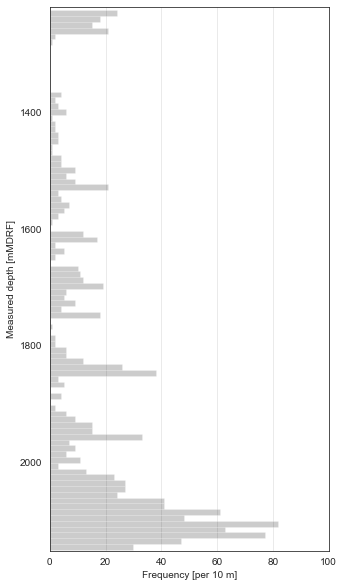

In [57]:
f,(ax) = plt.subplots(1,1,figsize=(5,10),sharey=True)

ax.hist(dffractures['depth_mMDRF'], 
        bins=bins_method1, 
        orientation="horizontal", 
        color='k', 
        alpha=0.2)

ax.set_ylim(2152,1219) # set to bottom and top of the logged interval
ax.set_xlim(0,100)
ax.xaxis.grid(alpha=0.5)
ax.set_xlabel('Frequency [per 10 m]')
ax.set_ylabel('Measured depth [mMDRF]')
plt.show()

## Add stratigraphic units to the histogram

A stratigrapic sequence is made up below to illustrate the method. If you have stratigraphic or lithologic data in a csv table, this can be imported in the same way as the fractures were above. 

In [52]:
data = {
        'from': [1219, 1600, 2000], 
        'to': [1600, 2000, 2152], 
        'rocktype': ['Some Rock', 'Another Rock', 'Almost Rock'],
       }

dfstrat = pd.DataFrame(data=data)
dfstrat

,from,to,rocktype
0,1219,1600,Some Rock
1,1600,2000,Another Rock
2,2000,2152,Almost Rock


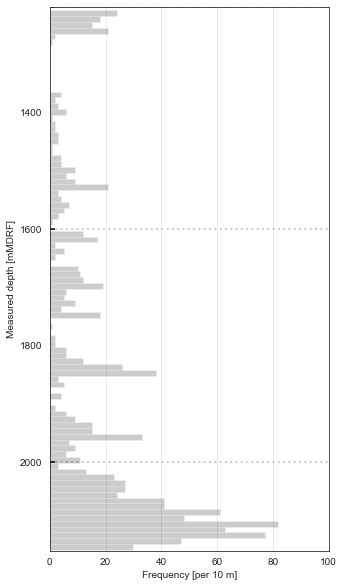

In [53]:
f,(ax) = plt.subplots(1,1,figsize=(5,10),sharey=True)

ax.hist(dffractures['depth_mMDRF'], 
        bins=bins_method1, 
        orientation="horizontal", 
        color='k', 
        alpha=0.2)

# add a small tick mark at the lithology contacts
ax.scatter(np.linspace(1,1,3), # (from this, to this, three values)
           dfstrat['from'],
           marker='_',
           color='k')

# add a dashed line at the contact
ax.hlines(dfstrat['from'],
          0,100,  # from, to, along the x axis
          colors='k',
          linestyles=':',
          linewidth=2,
          alpha=0.2)

ax.set_ylim(2152,1219)
ax.set_xlim(0,100)
ax.xaxis.grid(alpha=0.5)
ax.set_xlabel('Frequency [per 10 m]')
ax.set_ylabel('Measured depth [mMDRF]')
plt.show()

## Highlighting a depth range

You may wish to highlight a particuar depth range. In the example below, I've made up some feedzone depths and plotted them on the histogram.

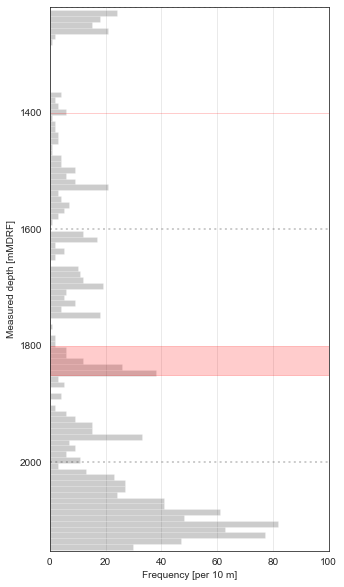

In [54]:
f,(ax) = plt.subplots(1,1,figsize=(5,10),sharey=True)

ax.hist(dffractures['depth_mMDRF'], 
        bins=bins_method1, 
        orientation="horizontal", 
        color='k', 
        alpha=0.2)

ax.hlines(dfstrat['from'],
          0,100,
          colors='k', 
          linestyles=':', 
          linewidth=2,
          alpha=0.2)

feedzones = [(1400,1401),(1800,1850)]

for top, bottom in feedzones:
    ax.axhspan(top, bottom, color='r', alpha=.2)

ax.set_ylim(2152,1219)
ax.set_xlim(0,100)
ax.xaxis.grid(alpha=0.5)
ax.set_xlabel('Frequency [per 10 m]')
ax.set_ylabel('Measured depth [mMDRF]')
plt.show()